In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
df = pd.read_csv('../Data/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<Axes: ylabel='Frequency'>

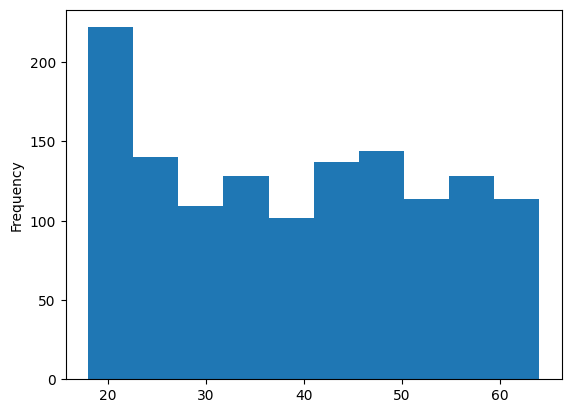

In [3]:
df["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

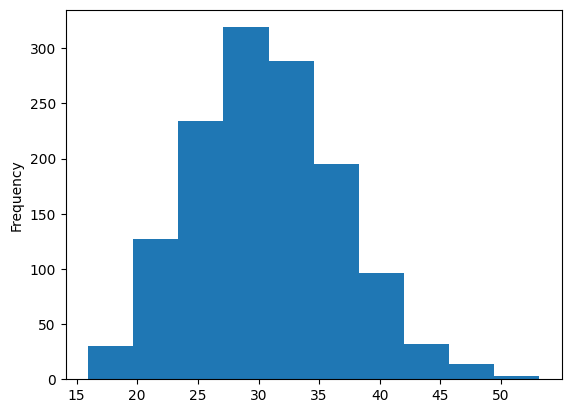

In [4]:
df["bmi"].plot(kind="hist")

<Axes: ylabel='Frequency'>

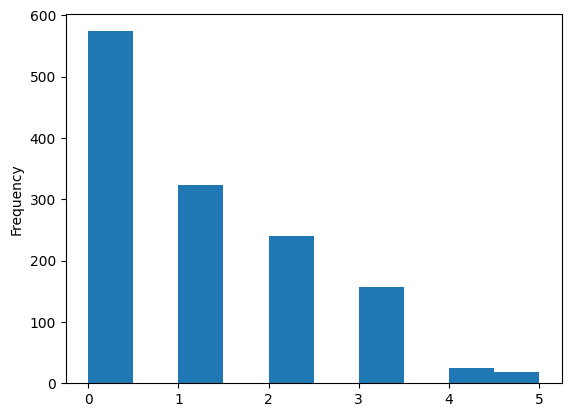

In [5]:
df["children"].plot(kind="hist")

### We need to scale the data so that all the values will become between 0 and 1

In [6]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [7]:
# Create a tranformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all the values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X and y
X = df.drop("charges", axis=1)
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Fit the column transformer to our training data
ct.fit(X_train, y_train)

# transform training and testing data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [8]:
y_test

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
           ...     
701      9541.69555
672      4399.73100
1163     2200.83085
1103    11363.28320
1295     1964.78000
Name: charges, Length: 402, dtype: float64

In [9]:
# what does our data look like
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [10]:
X_train_normal[0]

array([0.93478261, 0.40893193, 0.        , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [11]:
X_train.shape, X_train_normal.shape

((936, 6), (936, 11))

In [12]:
# Making function ro reuse
def mae(y_test, y_pred):
    return tf.keras.metrics.mae(y_true = y_test,
                               y_pred = tf.squeeze(y_pred))

def mse(y_test, y_pred):
    return tf.keras.metrics.mse(y_true = y_test,
                               y_pred = tf.squeeze(y_pred))

In [13]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.Adam(),
             metrics = ["mae"])

history = model.fit(X_train_normal, y_train, epochs=200, verbose=0)

In [14]:
model.evaluate(X_test_normal, y_test)

13/13 [==============================] - 0s 2ms/step - loss: 3143.9810 - mae: 3143.9810


[3143.98095703125, 3143.98095703125]

In [15]:
y_pred_1 = model.predict(X_test_normal)
y_pred_1

13/13 [==============================] - 0s 2ms/step


array([[ 9169.217  ],
       [ 5918.357  ],
       [44221.5    ],
       [ 9098.592  ],
       [32305.705  ],
       [ 5699.378  ],
       [ 1098.9786 ],
       [13228.61   ],
       [ 3541.8118 ],
       [10030.103  ],
       [35657.875  ],
       [ 7639.247  ],
       [ 4168.571  ],
       [40776.19   ],
       [43181.01   ],
       [40472.59   ],
       [10445.9795 ],
       [40366.305  ],
       [ 8535.678  ],
       [38731.715  ],
       [ 3974.6226 ],
       [ 7931.634  ],
       [  758.5611 ],
       [ 3099.101  ],
       [10666.749  ],
       [11108.223  ],
       [12115.454  ],
       [ 4768.1323 ],
       [ 9763.308  ],
       [  522.22687],
       [ 8175.1265 ],
       [11498.3955 ],
       [ 1946.7216 ],
       [ 5029.8647 ],
       [ 2963.0017 ],
       [ 8707.993  ],
       [ 1879.6315 ],
       [ 7805.8438 ],
       [41341.24   ],
       [37015.47   ],
       [ 3044.852  ],
       [ 2315.7866 ],
       [11499.295  ],
       [11299.24   ],
       [ 5513.041  ],
       [11

In [16]:
# calculate the error metrics
mae_1 = mae(y_test,y_pred_1)
mae_1

<tf.Tensor: shape=(), dtype=float32, numpy=3143.9807>

In [17]:
mse_1 = mse(y_test, y_pred_1)
mse_1

<tf.Tensor: shape=(), dtype=float32, numpy=43225984.0>

Text(0, 0.5, 'loss')

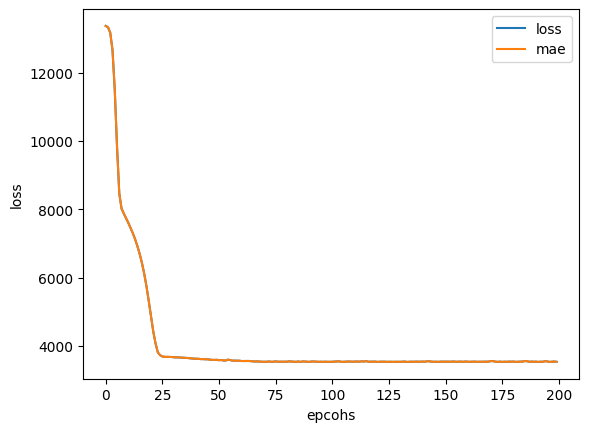

In [18]:
# plot history (also known as loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.xlabel("epcohs")
plt.ylabel("loss")

#### testing another model with activation

In [19]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(50 ,activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

model_2.compile(loss = tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.Adam(),
             metrics = ["mae"])

history2 = model_2.fit(X_train_normal, y_train, epochs=200, verbose=0)

In [20]:
model_2.evaluate(X_test_normal, y_test)

13/13 [==============================] - 0s 3ms/step - loss: 2636.5752 - mae: 2636.5752


[2636.5751953125, 2636.5751953125]

In [21]:
y_pred_2 = model_2.predict(X_test_normal)
y_pred_2

13/13 [==============================] - 0s 2ms/step


array([[ 9069.09  ],
       [ 5276.1396],
       [42014.895 ],
       [ 9259.542 ],
       [25978.434 ],
       [ 4525.8096],
       [ 2092.6077],
       [14196.911 ],
       [ 3732.634 ],
       [10245.708 ],
       [33267.12  ],
       [ 7234.107 ],
       [ 3953.2097],
       [43309.918 ],
       [48191.457 ],
       [42815.91  ],
       [ 9931.72  ],
       [40447.566 ],
       [ 8242.317 ],
       [33270.668 ],
       [ 5116.785 ],
       [ 7426.711 ],
       [ 1259.0354],
       [ 2802.5803],
       [11060.771 ],
       [10995.002 ],
       [12642.263 ],
       [ 5175.905 ],
       [ 9700.38  ],
       [ 1147.134 ],
       [ 8244.697 ],
       [11877.549 ],
       [ 2053.6282],
       [ 5697.7056],
       [ 2886.8381],
       [ 7461.413 ],
       [ 2588.7593],
       [ 7322.5566],
       [36752.965 ],
       [37258.32  ],
       [ 4647.491 ],
       [ 2639.7793],
       [11756.329 ],
       [11987.369 ],
       [ 4882.704 ],
       [12177.739 ],
       [ 3605.805 ],
       [ 4408

In [22]:
mae_2 = mae(y_test, y_pred_2)
mae_2

<tf.Tensor: shape=(), dtype=float32, numpy=2636.5754>

In [23]:
mse_2 = mse(y_test, y_pred_2)
mse_2

<tf.Tensor: shape=(), dtype=float32, numpy=36296450.0>

Text(0, 0.5, 'loss')

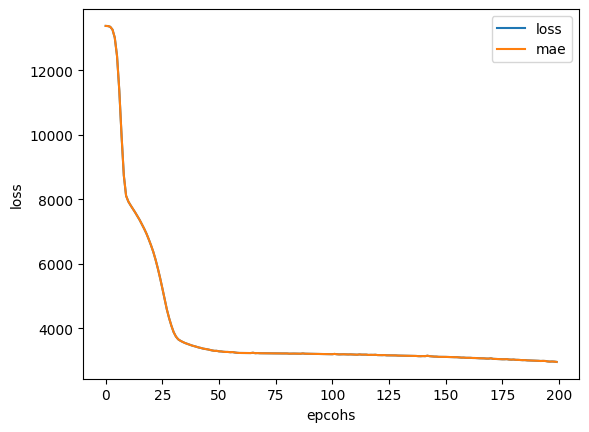

In [24]:
# plot history (also known as loss curve or a training curve)
pd.DataFrame(history2.history).plot()
plt.xlabel("epcohs")
plt.ylabel("loss")

### Model_3

In [25]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu'),
])

model_3.compile(loss = tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.Adam(),
             metrics = ["mae"])

history3 = model_3.fit(X_train_normal, y_train, epochs=200, verbose=0)

In [26]:
model_3.evaluate(X_test_normal, y_test)

13/13 [==============================] - 0s 2ms/step - loss: 1754.0540 - mae: 1754.0540


[1754.053955078125, 1754.053955078125]

In [27]:
y_pred_3 = model_3.predict(X_test_normal)
y_pred_3

13/13 [==============================] - 0s 2ms/step


array([[ 9051.698 ],
       [ 5214.8555],
       [30181.965 ],
       [ 9204.009 ],
       [24928.357 ],
       [ 4432.4907],
       [ 2094.5037],
       [14182.599 ],
       [ 3698.747 ],
       [10143.362 ],
       [20249.994 ],
       [ 7181.595 ],
       [ 3908.344 ],
       [50272.14  ],
       [52997.617 ],
       [45468.727 ],
       [ 9707.369 ],
       [42455.42  ],
       [ 8142.3267],
       [23892.133 ],
       [ 5065.8296],
       [ 7337.2856],
       [ 1214.8717],
       [ 2777.953 ],
       [10978.791 ],
       [10919.417 ],
       [12518.858 ],
       [ 5136.2817],
       [ 9677.12  ],
       [ 1115.2332],
       [ 8188.442 ],
       [11792.836 ],
       [ 2003.6136],
       [ 5671.81  ],
       [ 2835.8408],
       [ 7401.3813],
       [ 2510.5938],
       [ 7256.5024],
       [23934.22  ],
       [36610.434 ],
       [ 4551.5894],
       [ 2612.2554],
       [11580.431 ],
       [12037.286 ],
       [ 4827.5293],
       [12180.966 ],
       [ 3545.7168],
       [ 4362

In [28]:
mae_3 = mae(y_test, y_pred_3)
mae_3

<tf.Tensor: shape=(), dtype=float32, numpy=1754.0541>

In [29]:
mse_3 = mse(y_test, y_pred_3)
mse_3

<tf.Tensor: shape=(), dtype=float32, numpy=20947602.0>

Text(0, 0.5, 'loss')

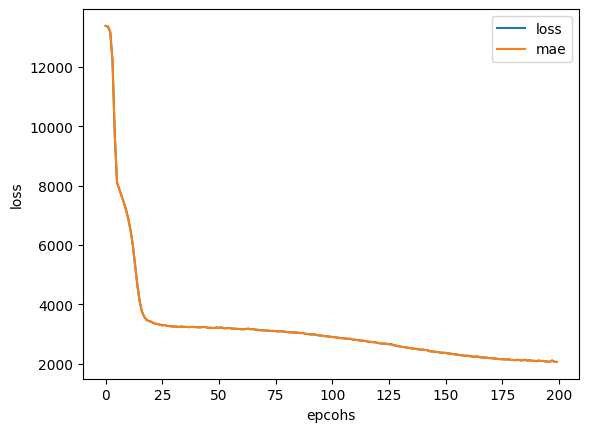

In [30]:
# plot history (also known as loss curve or a training curve)
pd.DataFrame(history3.history).plot()
plt.xlabel("epcohs")
plt.ylabel("loss")

### Model_4

In [31]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu'),
])

model_4.compile(loss = tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.Adam(),
             metrics = ["mae"])

history4 = model_4.fit(X_train_normal, y_train, epochs=200, verbose=0)

In [32]:
model_4.evaluate(X_test_normal, y_test)

13/13 [==============================] - 0s 2ms/step - loss: 1625.2262 - mae: 1625.2262


[1625.2261962890625, 1625.2261962890625]

In [33]:
y_pred_4 = model_4.predict(X_test_normal)
y_pred_4

13/13 [==============================] - 0s 2ms/step


array([[ 9069.333 ],
       [ 5208.2056],
       [29247.793 ],
       [ 9153.953 ],
       [27704.777 ],
       [ 4497.741 ],
       [ 2099.0312],
       [14161.677 ],
       [ 3749.1133],
       [10144.636 ],
       [18509.178 ],
       [ 7132.5146],
       [ 3853.628 ],
       [50223.15  ],
       [52865.03  ],
       [45857.883 ],
       [ 9593.368 ],
       [42747.07  ],
       [ 8094.888 ],
       [23229.934 ],
       [ 5063.7007],
       [ 7344.551 ],
       [ 1253.4296],
       [ 2753.7468],
       [10991.0625],
       [10866.329 ],
       [12550.69  ],
       [ 5106.459 ],
       [ 9670.712 ],
       [ 1117.1409],
       [ 8180.529 ],
       [11732.245 ],
       [ 1975.5975],
       [ 5648.8525],
       [ 2854.4004],
       [ 7378.4893],
       [ 2499.3994],
       [ 7259.3066],
       [23930.205 ],
       [37398.008 ],
       [ 4555.3296],
       [ 2618.1562],
       [11542.72  ],
       [11958.405 ],
       [ 4771.8926],
       [12122.769 ],
       [ 3598.7842],
       [ 4332

In [34]:
mae_4 = mae(y_test, y_pred_4)
mae_4

<tf.Tensor: shape=(), dtype=float32, numpy=1625.2262>

In [35]:
mse_4 = mse(y_test, y_pred_4)
mse_4

<tf.Tensor: shape=(), dtype=float32, numpy=19977128.0>

Text(0, 0.5, 'loss')

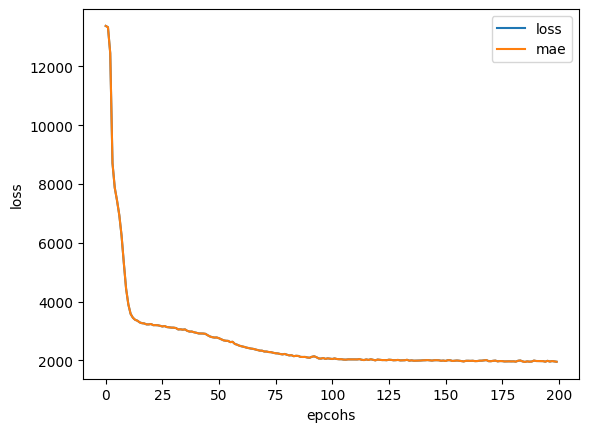

In [36]:
# plot history (also known as loss curve or a training curve)
pd.DataFrame(history4.history).plot()
plt.xlabel("epcohs")
plt.ylabel("loss")

In [37]:
# Let's compare our model's results using a pandas DataFrame
model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                ["model_2", mae_2.numpy(), mse_2.numpy()],
                ["model_3", mae_3.numpy(), mse_3.numpy()],
                ["model_4", mae_4.numpy(), mse_4.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model","mae","mse"])
all_results

,model,mae,mse
0,model_1,3143.980713,43225984.0
1,model_2,2636.575439,36296448.0
2,model_3,1754.054077,20947602.0
3,model_4,1625.226196,19977128.0


In [38]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 100)               1200      
                                                                 
 dense_14 (Dense)            (None, 100)               10100     
                                                                 
 dense_15 (Dense)            (None, 100)               10100     
                                                                 
 dense_16 (Dense)            (None, 50)                5050      
                                                                 
 dense_17 (Dense)            (None, 10)                510       
                                                                 
 dense_18 (Dense)            (None, 1)                 11        
                                                                 
Total params: 26971 (105.36 KB)
Trainable params: 2697